In [106]:
#Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [78]:
#Installing xgboost library and importing XGBClassifier
!pip install xgboost
from xgboost import XGBClassifier

In [79]:
#Installing shap library
!pip install shap

In [80]:
url = 'https://raw.githubusercontent.com/geniusai-research/interns_task/main/taskdata.csv'
df = pd.read_csv(url, error_bad_lines = False)
df.head(15)

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.00,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.00,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.00,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.00,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.50,48.230769,1.692308,17.461538,25.769231,0.230769,0
5,412391,113.0,1,1.000000,14,0.0,0.0,12.692308,380.769231,0,350.00,799.153846,115.153846,166.307692,160.769231,0.153846,0
6,412662,1005.0,21,4.636364,11,0.0,0.0,1.000000,26.363636,0,0.00,119.727273,12.454545,46.000000,57.272727,0.181818,0
7,457000,262.0,29,3.250000,16,0.0,0.0,3.250000,68.750000,3,63.07,26.937500,3.250000,18.625000,17.062500,0.062500,0
8,490356,1005.0,3,1.400000,5,0.0,0.0,0.000000,0.000000,5,0.00,2.500000,0.500000,1.000000,1.750000,0.000000,1
9,491551,1017.0,1,1.000000,2,0.0,0.0,0.000000,0.000000,0,0.00,74.500000,10.500000,4.500000,9.500000,0.000000,1


In [95]:
def descri(data):
    desc = data.describe()
    return desc

descri(df)

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target,total_replies
count,4.400000e+03,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000
mean,4.106191e+09,506.553864,22.362500,7.174561,9.884545,194.439208,16.969570,3.253853,72.217150,0.496591,339.299218,98.992841,16.768863,25.711065,27.655640,0.162266,0.103182,53.528972
std,6.798984e+09,326.072756,43.618703,19.219665,5.163509,1549.573607,128.369056,5.512943,117.082250,1.198236,832.312947,297.898133,67.975094,55.361244,61.110202,0.518064,0.304231,115.564413
min,4.100390e+05,111.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.184590e+08,226.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.153846,2.964286,0.000000,0.000000,13.538462,2.500000,4.490385,4.412500,0.000000,0.000000,9.000000
50%,7.293982e+08,493.000000,2.000000,1.076923,12.000000,0.000000,0.000000,2.000000,45.000000,0.000000,41.500000,40.000000,6.333333,12.307692,13.000000,0.000000,0.000000,25.607692
75%,7.292738e+09,1005.000000,30.000000,5.666667,14.000000,0.000000,0.000000,4.358766,100.000000,0.000000,328.275000,101.333333,14.250000,28.000000,30.804545,0.153846,0.000000,59.000000
max,7.356031e+10,1017.000000,354.000000,354.000000,24.000000,43957.172700,3852.727273,156.583333,3357.500000,5.000000,15606.500000,9183.866667,2606.000000,1716.400000,1743.266667,14.636364,1.000000,3463.466667


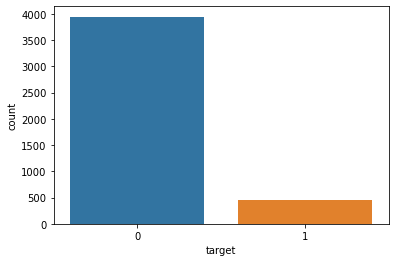

In [99]:
sns.countplot(x = 'target', data = df)
#Tells that most target values have a value of 0

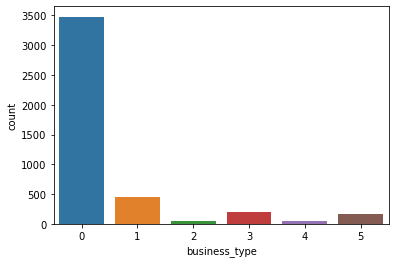

In [100]:
sns.countplot(x = 'business_type', data = df)
#tells that most business type is type 0

<Figure size 1440x1440 with 0 Axes>

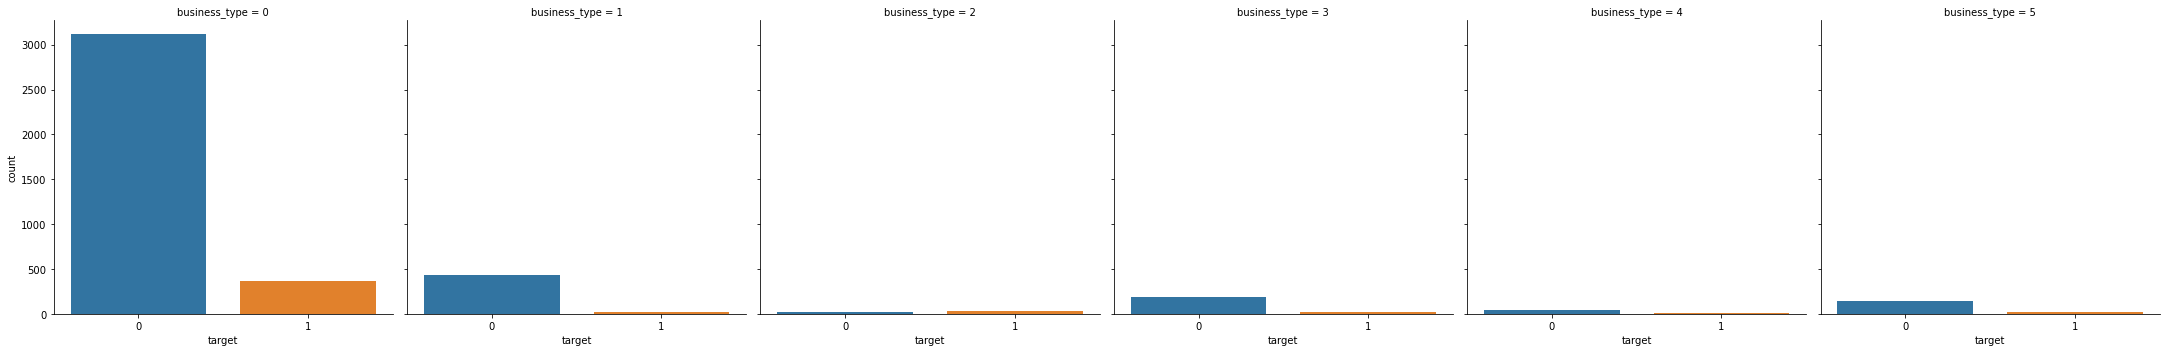

In [110]:
plt.figure(figsize =(20, 20))
sns.factorplot(x='target', col='business_type', kind='count', data=df)
#Business type is an important factor in deciding target

In [81]:
#To check the effect of various features on the target variable
def Check_corr(data):
    Correlation = data.corr()
    return Correlation
Check_corr(df)

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
user_id,1.000000,0.056700,0.028499,0.026847,-0.181716,-0.033229,-0.016305,-0.101787,-0.113606,0.042143,-0.096286,-0.061322,-0.004062,-0.105138,-0.098300,-0.070980,0.048490
account_id,0.056700,1.000000,0.186045,0.114084,-0.138623,-0.056088,-0.063251,-0.123744,-0.137692,-0.023560,-0.115246,-0.104818,-0.049433,-0.111508,-0.115326,-0.082611,0.121939
max_return_days,0.028499,0.186045,1.000000,0.749094,-0.186734,-0.001811,0.013263,-0.112033,-0.118764,-0.019023,-0.131315,-0.042675,-0.008815,-0.075633,-0.079001,-0.050154,0.275005
average_return_days,0.026847,0.114084,0.749094,1.000000,-0.256605,-0.014424,-0.006545,-0.108025,-0.113959,0.026801,-0.103527,-0.046713,-0.016387,-0.070537,-0.070755,-0.038732,0.165715
customer_since_months,-0.181716,-0.138623,-0.186734,-0.256605,1.000000,0.090540,0.063951,0.321568,0.350931,-0.218603,0.352093,0.138861,0.019360,0.206298,0.206565,0.123171,-0.234972
total_revenue,-0.033229,-0.056088,-0.001811,-0.014424,0.090540,1.000000,0.950358,0.608588,0.642122,-0.017495,0.075943,0.341777,0.130780,0.214070,0.214298,0.213396,-0.032571
average_revenue,-0.016305,-0.063251,0.013263,-0.006545,0.063951,0.950358,1.000000,0.586251,0.612556,-0.001665,0.070069,0.354470,0.132430,0.209710,0.209277,0.214935,-0.025354
avg_vas_count,-0.101787,-0.123744,-0.112033,-0.108025,0.321568,0.608588,0.586251,1.000000,0.962312,-0.119815,0.131268,0.413862,0.191781,0.360756,0.342740,0.240634,-0.117167
avg_used_vas_value,-0.113606,-0.137692,-0.118764,-0.113959,0.350931,0.642122,0.612556,0.962312,1.000000,-0.119799,0.156331,0.407619,0.185732,0.363019,0.347185,0.244277,-0.128469
business_type,0.042143,-0.023560,-0.019023,0.026801,-0.218603,-0.017495,-0.001665,-0.119815,-0.119799,1.000000,-0.107555,-0.076337,-0.005084,-0.050476,-0.054189,0.005367,0.005272


In [82]:
#check data type before further processing
def Check_dtype(data):
    types = data.dtypes
    return types

Check_dtype(df)

user_id                    int64
account_id               float64
max_return_days            int64
average_return_days      float64
customer_since_months      int64
total_revenue            float64
average_revenue          float64
avg_vas_count            float64
avg_used_vas_value       float64
business_type              int64
avg_wallet_bonus         float64
avg_active_ads           float64
avg_new_ads              float64
avg_email_replies        float64
avg_call_replies         float64
avg_sms_replies          float64
target                     int64
dtype: object

In [83]:
# To add the replies via email, call, sms to a single column 'total_replies'
sum = df['avg_email_replies'] + df['avg_call_replies'] + df['avg_sms_replies']
df['total_replies'] = sum

In [84]:
def Check_null_values(data):    
    null_values = data.isna().sum()
    return null_values

Check_null_values(df)

user_id                  0
account_id               7
max_return_days          0
average_return_days      0
customer_since_months    0
total_revenue            0
average_revenue          0
avg_vas_count            0
avg_used_vas_value       0
business_type            0
avg_wallet_bonus         0
avg_active_ads           0
avg_new_ads              0
avg_email_replies        0
avg_call_replies         0
avg_sms_replies          0
target                   0
total_replies            0
dtype: int64

In [85]:
# NA values are dropped because the number of NA values are very less as compared to the size of data
def Drop_NA(data):    
    drop = df.dropna(inplace = True)
    return drop

Drop_NA(df)

In [86]:
# Drop columns as 'total_replies' covers replies via call, email, sms and account_id as it has repeating values
df2 = df.drop(['account_id', 'avg_email_replies', 'avg_sms_replies', 'avg_call_replies'], axis = 1)

In [87]:
df2

,user_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,target,total_replies
0,410039,8,1.500000,14,0.00,0.00,3.666667,66.666667,0,300.0,79.333333,15.250000,0,60.583333
1,410240,37,8.200000,10,0.00,0.00,4.900000,114.000000,0,0.0,232.100000,18.300000,0,30.000000
2,411764,9,1.533333,15,0.00,0.00,5.333333,106.666667,0,150.0,55.083333,3.750000,0,44.750000
3,411985,1,1.000000,14,0.00,0.00,6.307692,176.153846,0,1481.0,409.538462,80.769231,1,145.076923
4,412071,1,1.000000,18,0.00,0.00,5.846154,109.230769,0,41.5,48.230769,1.692308,0,43.461538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4402,73498690100,1,1.000000,4,0.00,0.00,0.000000,0.000000,3,0.0,4.666667,2.000000,0,24.666667
4403,73519239100,1,1.000000,2,0.00,0.00,0.000000,0.000000,4,0.0,153.000000,76.500000,0,20.500000
4404,73525763100,1,1.000000,2,0.00,0.00,0.000000,0.000000,1,0.0,0.000000,0.000000,0,0.000000
4405,73538605100,1,1.000000,2,551.19,551.19,7.000000,70.000000,1,0.0,17.000000,17.000000,0,18.000000


In [88]:
#Splitting in features and target matrix and then further splitting into train test split
X = df2.drop(['target', 'user_id'], axis = 1)
y = df2.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, stratify = y, test_size = 0.2)

In [89]:
#Checking which features contribute more to model on the basis of ROC_AUC value
roc_auc = []
for feature in X_train.columns:
    clf = XGBClassifier()
    mod = clf.fit(X_train[feature].to_frame(), y_train)
    y_pred = mod.predict(X_test[feature].to_frame())
    roc_auc.append(roc_auc_score(y_test, y_pred))

In [90]:
#print(roc_auc)
roc_values = pd.Series(roc_auc)
roc_values.index = X_train.columns
roc_values.sort_values(ascending = False, inplace = True)
roc_values

average_return_days      0.544172
max_return_days          0.532124
total_revenue            0.509088
business_type            0.507820
avg_active_ads           0.505495
average_revenue          0.502960
avg_vas_count            0.500000
customer_since_months    0.500000
avg_wallet_bonus         0.499366
avg_new_ads              0.498733
avg_used_vas_value       0.498733
total_replies            0.498099
dtype: float64

In [91]:
#Selecting the features having roc_auc score greater than or equal to 0.5
to_sel = roc_values[roc_values>=0.5]

In [92]:
#Taking informative features for training and test on the basis of ROC_AUC score
X_train_roc = X_train[to_sel.index]
X_test_roc = X_test[to_sel.index]

In [93]:
#Training the model
def Classifier(X_train, X_test, y_train, y_test):
    import shap    
    clf = XGBClassifier(objective="binary:logistic", random_state = 0).fit(X_train, y_train)
    #mod = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    explain = shap.TreeExplainer(clf)
    values = explain.shap_values(X_test)
    print("Accuracy:", accuracy_score(y_pred, y_test))
    shap.initjs()
    X_display,y_display = shap.datasets.adult(display=True)
    shap.summary_plot(values, X_test, plot_type = 'bar')
    shap.summary_plot(values, X_test)

Accuracy: 0.9011363636363636


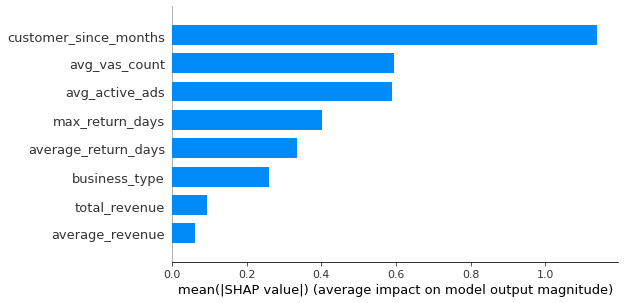

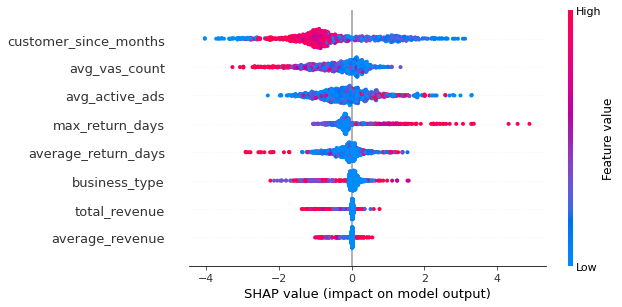

In [94]:
Classifier(X_train_roc, X_test_roc, y_train, y_test)